### EDA + Visualisation

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import country_converter as coco

import seaborn as sns
import missingno as msno
from PIL import Image
import requests

In [2]:
books = pd.read_csv("Books_final.csv")
ratings = pd.read_csv("Ratings_final.csv")
users = pd.read_csv("Users_final.csv")

In [3]:
def plot_top20(df, column, title, x_label, y_label, top=20):

    pl = df[column].value_counts().head(top)
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.barplot(x=pl.index, y=pl.values, ax=ax, palette="PuBuGn")
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    plt.xticks(rotation=90)
    plt.show()

### Top years in which books were published

In [4]:
books['Year-Of-Publication'] = books['Year-Of-Publication'].astype('int32')

In [5]:
books.dtypes

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication     int32
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object

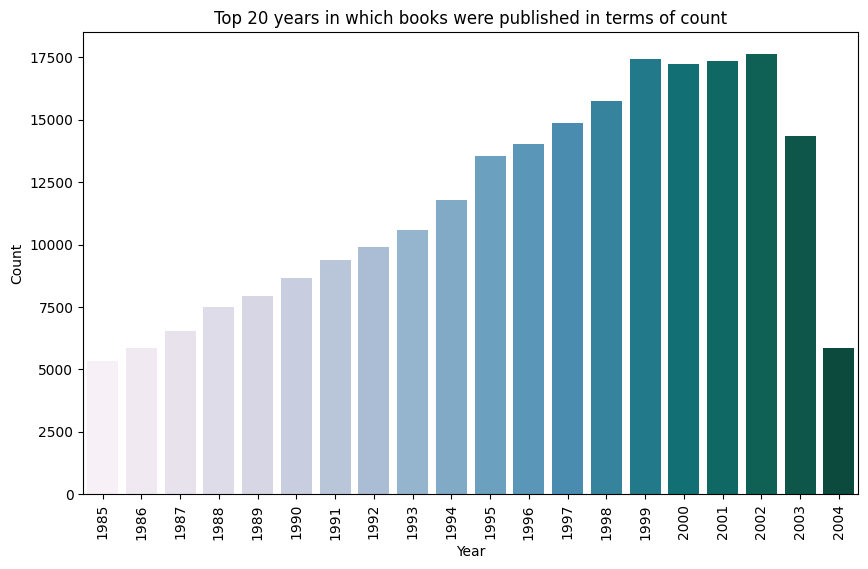

In [6]:
plot_top20(books, 'Year-Of-Publication', 'Top 20 years in which books were published in terms of count', "Year",'Count')

### Total Books published yearly

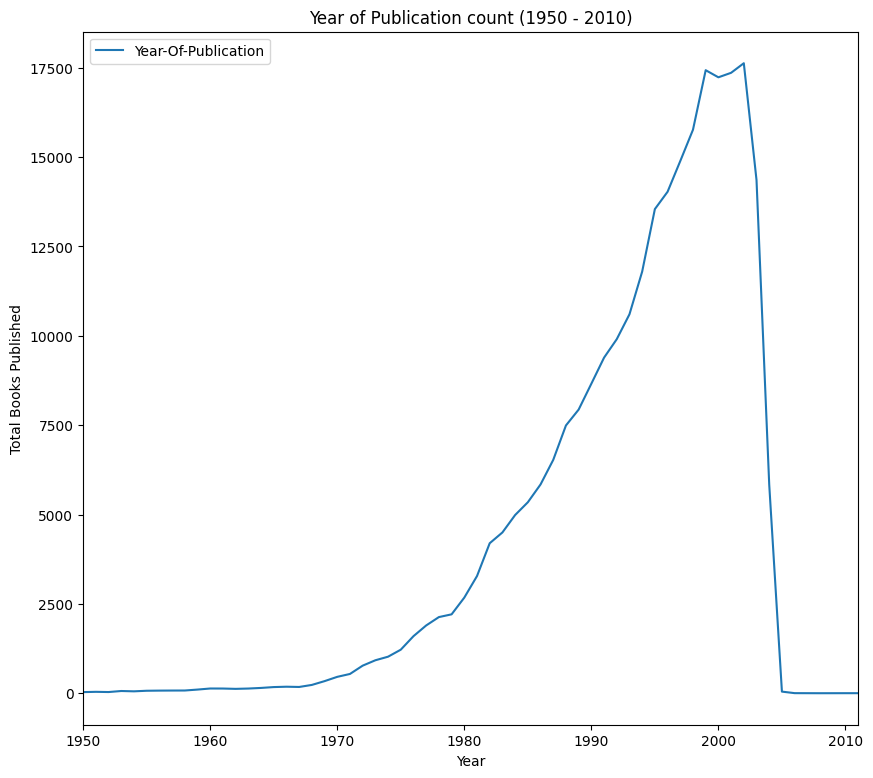

In [7]:
year_count=books['Year-Of-Publication'].value_counts()
year_count=pd.DataFrame(year_count)

plt.figure(figsize=(10, 9))
sns.lineplot(data=year_count)
plt.title('Year of Publication count (1950 - 2010)')
plt.xlim(1950, 2011)
plt.xlabel('Year')
plt.ylabel('Total Books Published')
plt.show()

### Top publishers who have published books

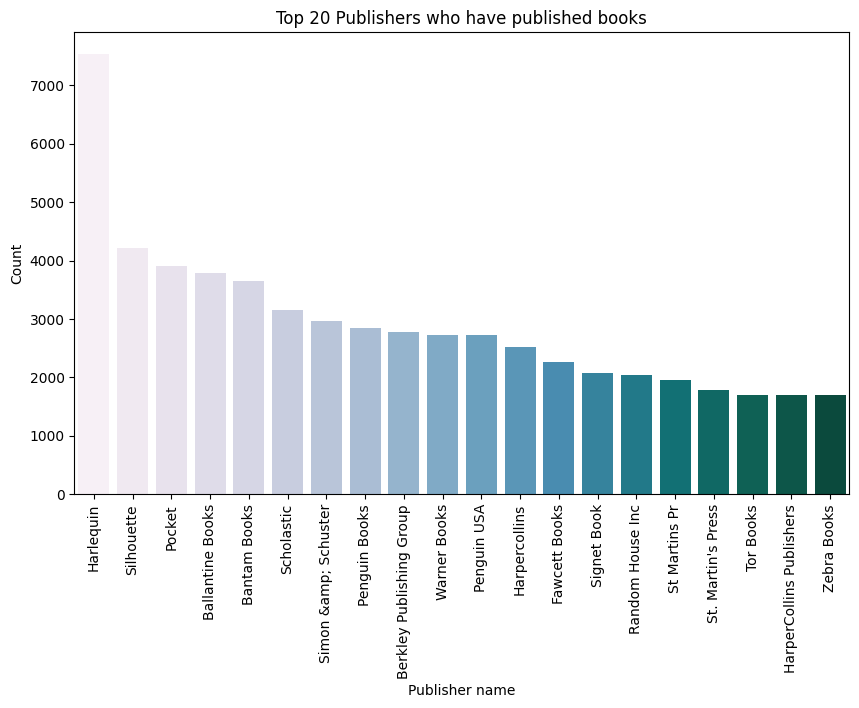

In [8]:
plot_top20(books, 'Publisher', "Top 20 Publishers who have published books", "Publisher name", "Count")

### Top Authers authored books

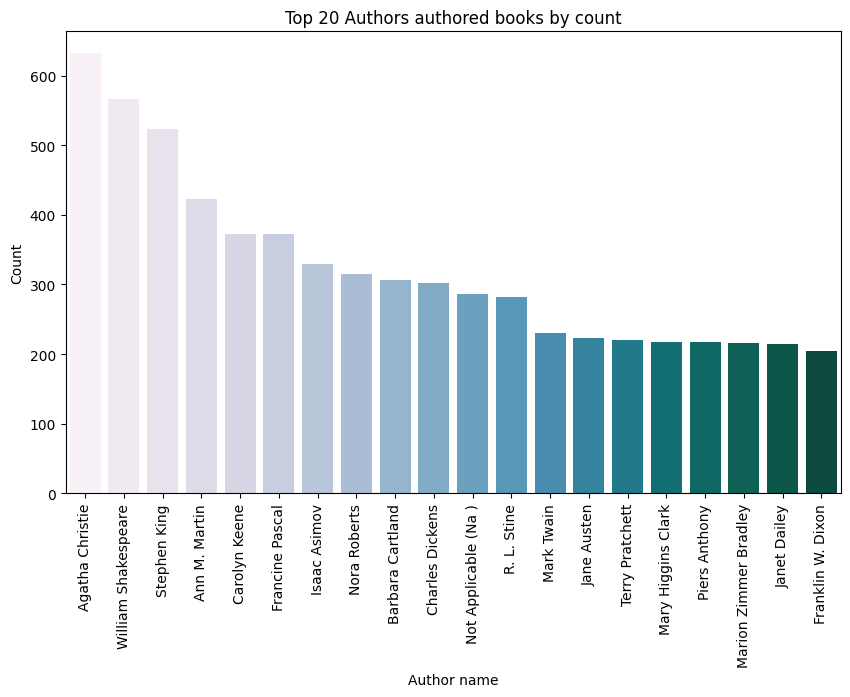

In [9]:
plot_top20(books, 'Book-Author', "Top 20 Authors authored books by count", "Author name", "Count")

In [12]:
books_with_ratings = pd.merge(books, ratings, on='ISBN')

In [13]:
books_with_ratings.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
0,0786243244,Murder in the Blood (Five Star First Edition M...,Gene Deweese,2002,Five Star (ME),http://images.amazon.com/images/P/0786243244.0...,http://images.amazon.com/images/P/0786243244.0...,http://images.amazon.com/images/P/0786243244.0...,98391.0,8.0
1,0140056696,Modern Irish Short Stories,Ben Forkner,1994,Penguin USA,http://images.amazon.com/images/P/0140056696.0...,http://images.amazon.com/images/P/0140056696.0...,http://images.amazon.com/images/P/0140056696.0...,70164.0,9.0
2,037397101X,Do Not Go Gentle,Mark Stevens,1989,Worldwide Library,http://images.amazon.com/images/P/037397101X.0...,http://images.amazon.com/images/P/037397101X.0...,http://images.amazon.com/images/P/037397101X.0...,254241.0,0.0
3,0736900462,"Jesus, Man of Joy",Sherwood E. Wirt,1999,Harvest House Publishers,http://images.amazon.com/images/P/0736900462.0...,http://images.amazon.com/images/P/0736900462.0...,http://images.amazon.com/images/P/0736900462.0...,269932.0,0.0
4,0385193866,"Gay Life: Leisure, Love, and Living for the Co...",ERIC ROFES,1986,Doubleday,http://images.amazon.com/images/P/0385193866.0...,http://images.amazon.com/images/P/0385193866.0...,http://images.amazon.com/images/P/0385193866.0...,138578.0,0.0


In [14]:
books_with_ratings.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
User-ID                0
Book-Rating            0
dtype: int64

In [15]:
def cat_summary_with_graph(dataframe, col_name):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    # Countplot
    sns.countplot(x=col_name, data=dataframe, ax=axes[0])
    axes[0].set_title('Countplot')
    # Pie chart
    value_counts = dataframe[col_name].value_counts()
    axes[1].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')
    axes[1].set_title('Percentages')
    fig.suptitle(col_name, fontsize=14)
    plt.tight_layout()
    plt.show()

### Ratings Piechart

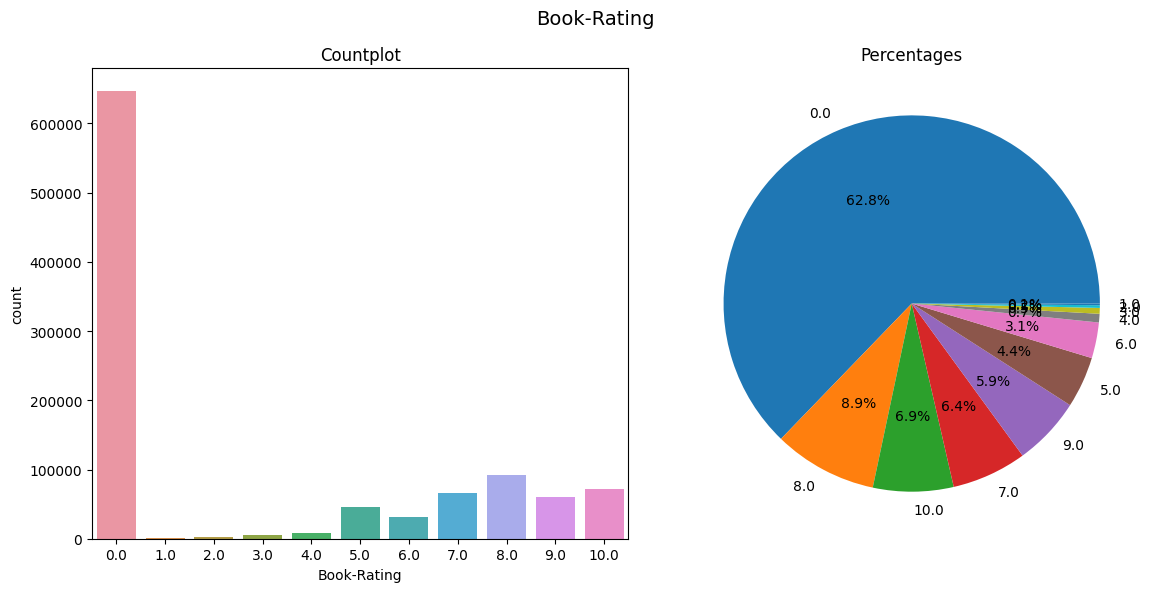

In [16]:
cat_summary_with_graph(books_with_ratings, 'Book-Rating')

In [17]:
authors_top20 = books['Book-Author'].value_counts().head(20)
authors_top20 = list(authors_top20.index)

In [18]:
top20_authors = pd.DataFrame(columns = books_with_ratings.columns)

for author in authors_top20:
    
    cond_df = books_with_ratings[books_with_ratings['Book-Author'] == author]
    
    top20_authors =  pd.concat([top20_authors, cond_df], axis=0)

In [19]:
top20_authors.shape

(45234, 10)

In [20]:
top20_author = top20_authors[top20_authors['Book-Rating'] != 0]


In [21]:
top20_author.shape

(16871, 10)

In [22]:
top20_author = top20_author.groupby('Book-Author')['Book-Rating'].agg('mean').reset_index().sort_values(by='Book-Rating', ascending=False)
top20_author

,Book-Author,Book-Rating
19,William Shakespeare,8.303357
11,Mark Twain,8.284507
8,Jane Austen,8.187595
18,Terry Pratchett,8.151177
14,Not Applicable (Na ),8.094340
7,Isaac Asimov,7.915167
3,Carolyn Keene,7.823529
17,Stephen King,7.815046
0,Agatha Christie,7.792102
4,Charles Dickens,7.762836


### Ratings of books of Top 20 Authors

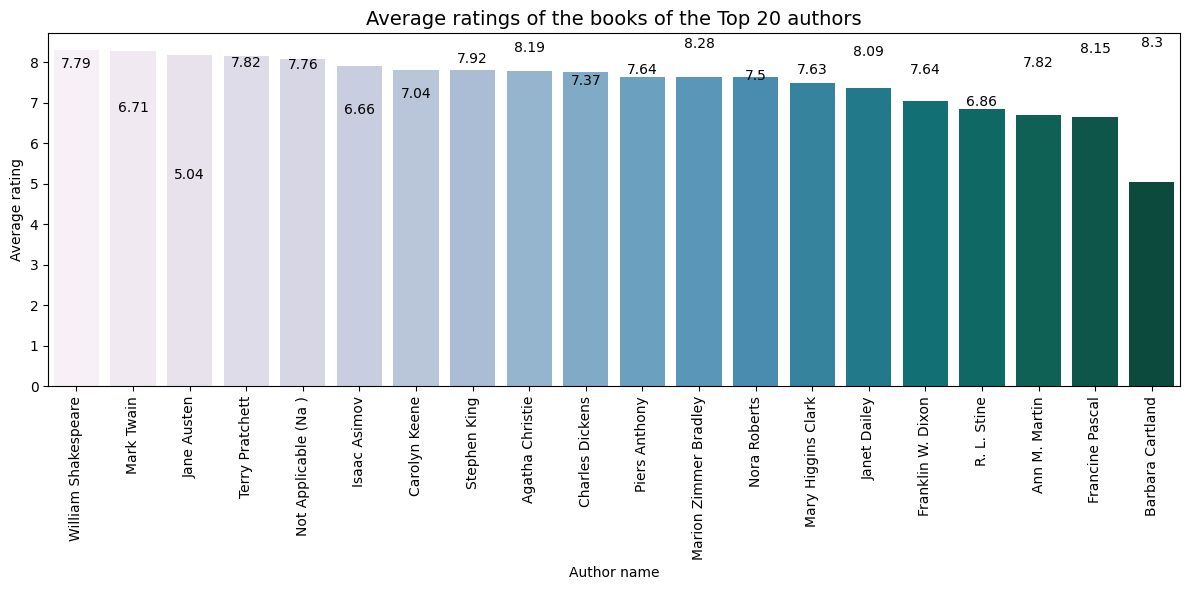

In [23]:
top20_author = top20_author.sort_values('Book-Rating', ascending=False)

# bar plot using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Book-Author', y='Book-Rating', data=top20_author, palette='PuBuGn')

for index, row in top20_author.iterrows():
    plt.text(index, row['Book-Rating'], round(row['Book-Rating'], 2), ha='center', va='bottom', fontsize=10)

plt.title("Average ratings of the books of the Top 20 authors", fontsize=14)
plt.xlabel("Author name")
plt.ylabel("Average rating")

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [24]:
publishers_top20 = books['Publisher'].value_counts().head(20)
publishers_top20 = list(publishers_top20.index)

top20_publishers = pd.DataFrame(columns = books_with_ratings.columns)

for pub in publishers_top20:
    
    cond_df = books_with_ratings[books_with_ratings['Publisher'] == pub]
    
    top20_publishers =  pd.concat([top20_publishers, cond_df], axis=0)
    
    
top20_publishers = top20_publishers[top20_publishers['Book-Rating'] != 0]
top20_publishers = top20_publishers.groupby('Publisher')['Book-Rating'].agg('mean').reset_index().sort_values(by='Book-Rating', ascending=False)

top20_publishers

,Publisher,Book-Rating
11,Scholastic,7.818161
7,Penguin Books,7.773789
17,Tor Books,7.686075
0,Ballantine Books,7.610437
16,St. Martin's Press,7.596059
12,Signet Book,7.591292
5,HarperCollins Publishers,7.584115
9,Pocket,7.564115
18,Warner Books,7.543623
14,Simon &amp; Schuster,7.522894


### Ratings of books of Top 20 Publishers

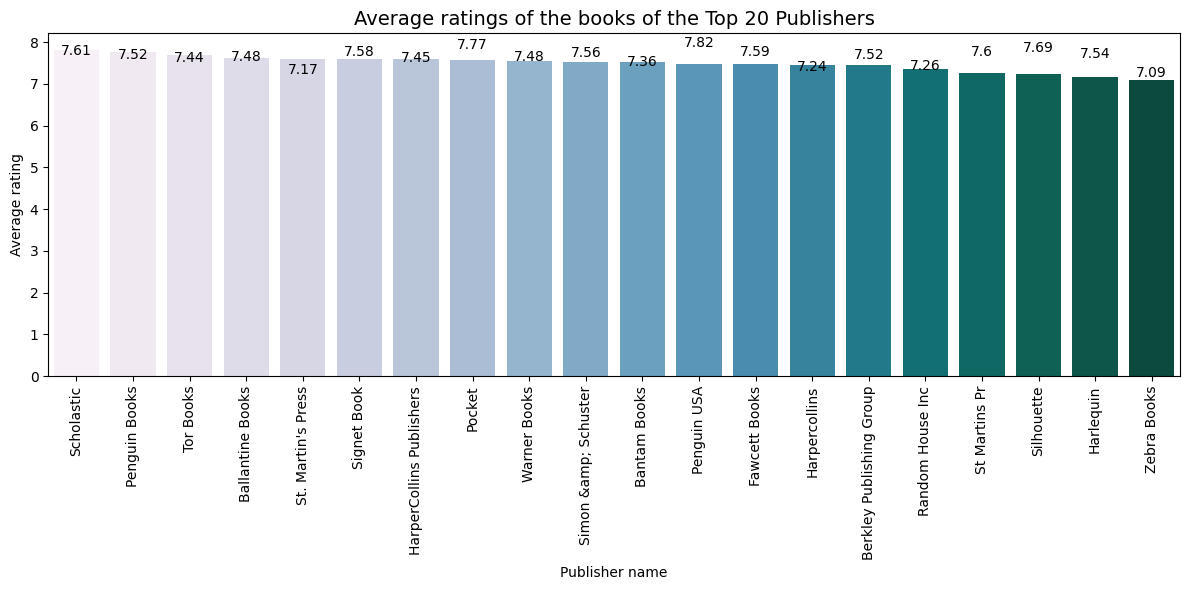

In [25]:
# Sorting the DataFrame by 'Book-Rating' in descending order
top20_publishers = top20_publishers.sort_values('Book-Rating', ascending=False)

# bar plot using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Publisher', y='Book-Rating', data=top20_publishers, palette='PuBuGn')

for index, row in top20_publishers.iterrows():
    plt.text(index, row['Book-Rating'], round(row['Book-Rating'], 2), ha='center', va='bottom', fontsize=10)

plt.title("Average ratings of the books of the Top 20 Publishers", fontsize=14)
plt.xlabel("Publisher name")
plt.ylabel("Average rating")

plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

### Most rated books by Users

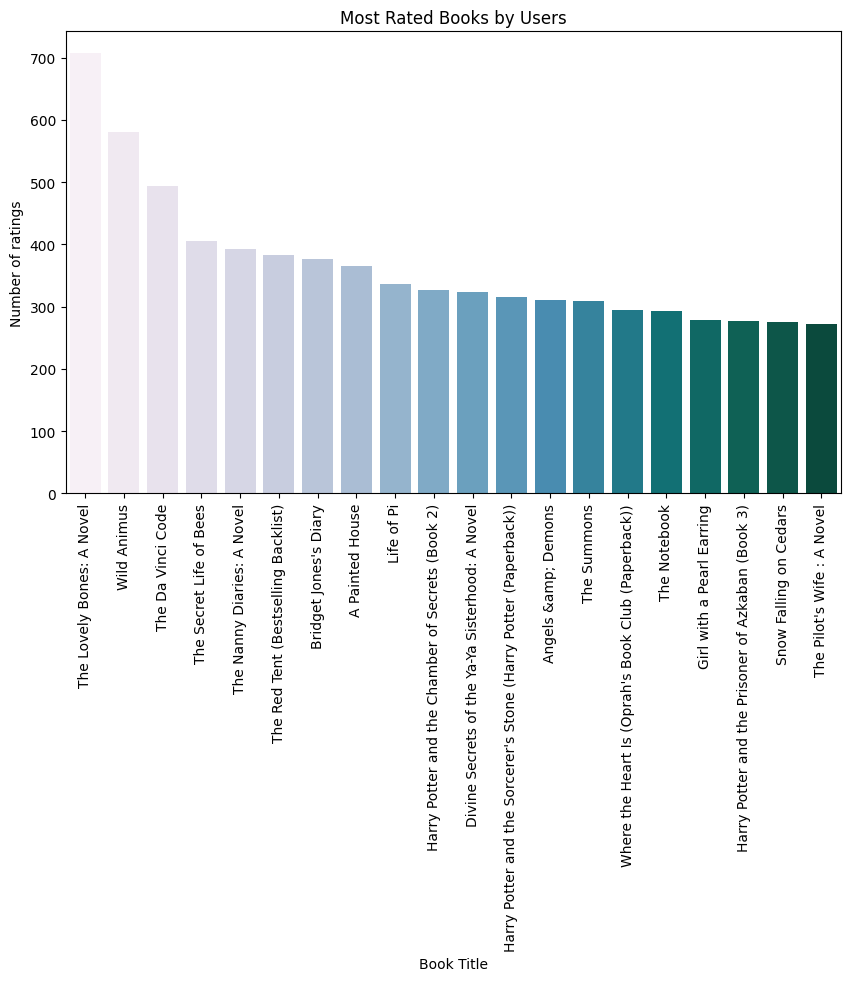

In [26]:
df = pd.merge(books_with_ratings, users, on='User-ID')
df = books_with_ratings[books_with_ratings['Book-Rating'] != 0]
plot_top20(df, 'Book-Title', "Most Rated Books by Users", "Book Title", "Number of ratings")

In [27]:
books_top20 = df['Book-Title'].value_counts().head(20)
books_top20 = list(books_top20.index)

top20_books = pd.DataFrame(columns = books_with_ratings.columns)

for book in books_top20:
    
    cond_df = books_with_ratings[books_with_ratings['Book-Title'] == book]
    
    top20_books =  pd.concat([top20_books, cond_df], axis=0)
    
    
top20_books = top20_books[top20_books['Book-Rating'] != 0]
top20_books = top20_books.groupby('Book-Title')['Book-Rating'].agg('mean').reset_index().sort_values(by='Book-Rating', ascending=False)

top10_books = top20_books.head(10)
top10_books


,Book-Title,Book-Rating
6,Harry Potter and the Prisoner of Azkaban (Book 3),9.043321
7,Harry Potter and the Sorcerer's Stone (Harry P...,8.936508
5,Harry Potter and the Chamber of Secrets (Book 2),8.840491
16,The Secret Life of Bees,8.477833
10,The Da Vinci Code,8.439271
11,The Lovely Bones: A Novel,8.185290
15,The Red Tent (Bestselling Backlist),8.182768
18,Where the Heart Is (Oprah's Book Club (Paperba...,8.142373
8,Life of Pi,8.080357
1,Angels &amp; Demons,8.016129


### Top rated Books by Users

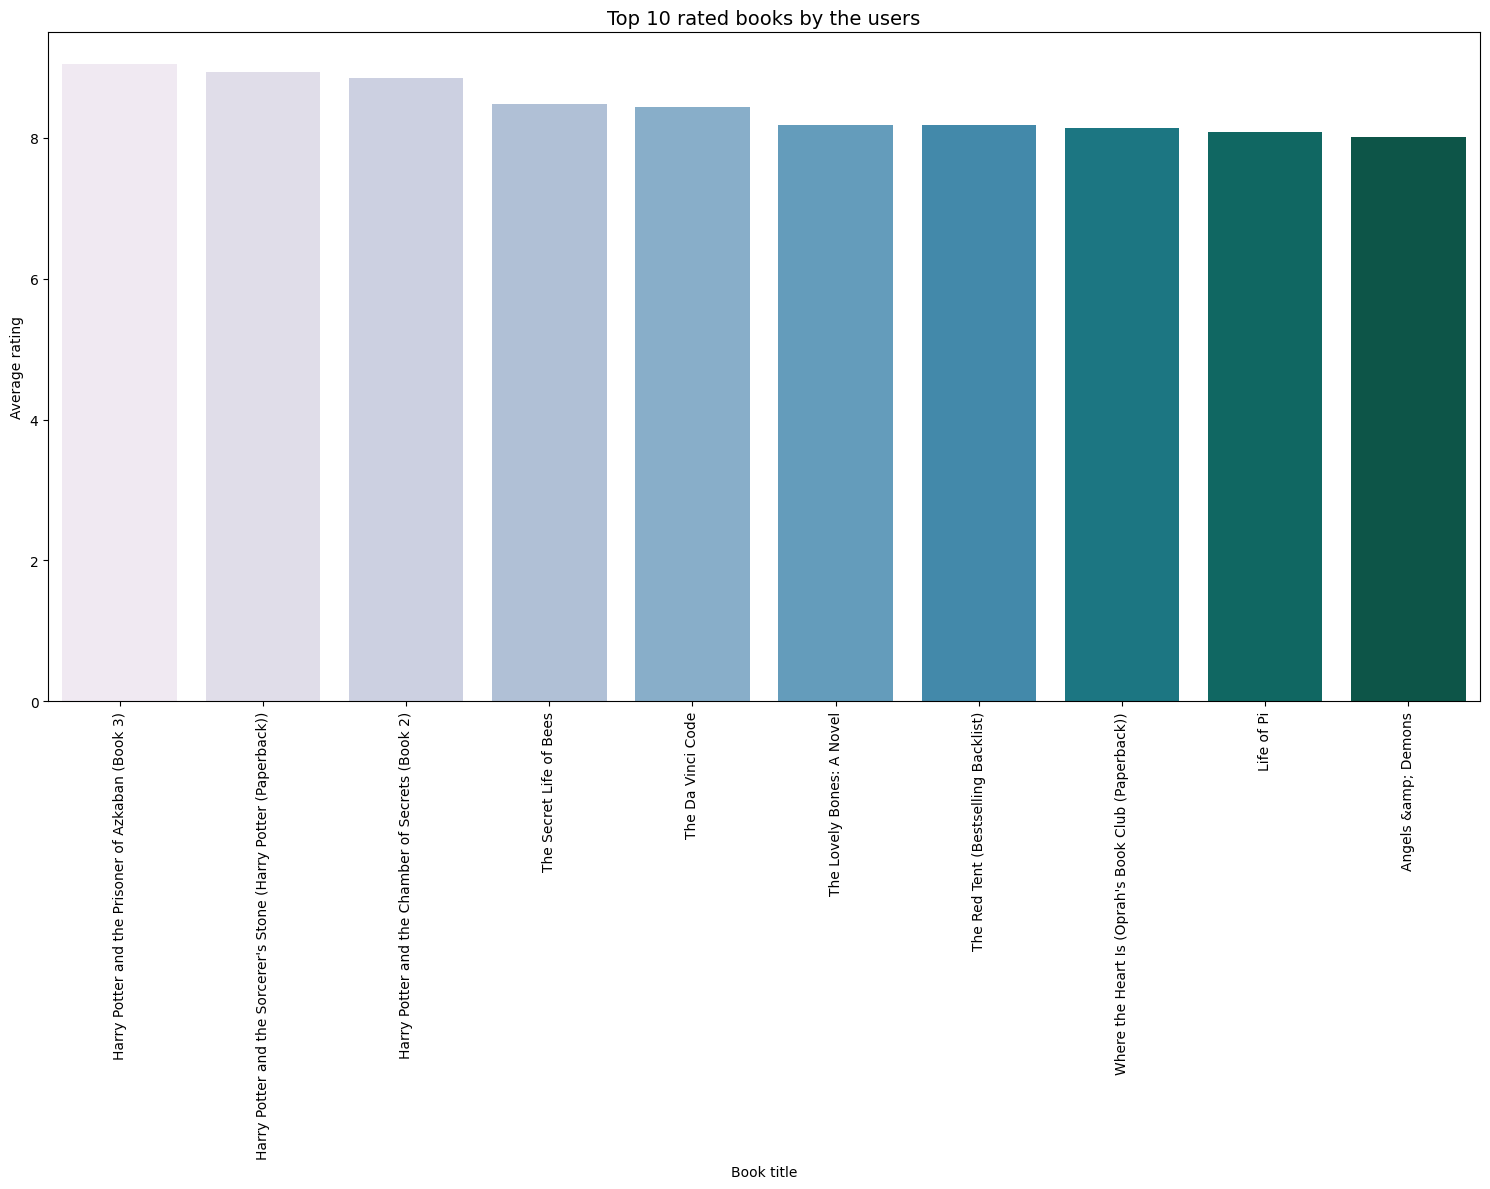

In [34]:
top10_books = top10_books.sort_values('Book-Rating', ascending=False)

plt.figure(figsize=(15, 12))
sns.barplot(x='Book-Title', y='Book-Rating', data=top10_books, palette='PuBuGn')

# for index, row in top10_books.iterrows():
#     plt.text(index, row['Book-Rating'], round(row['Book-Rating'], 2), ha='center', va='bottom', fontsize=10)

plt.title("Top 10 rated books by the users", fontsize=14)
plt.xlabel("Book title")
plt.ylabel("Average rating")

plt.xticks(rotation=90)
plt.tight_layout()

plt.show()